In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Image

In [63]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

def edge_mask(img, line_size, blur_value):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size , blur_value)
    return edges

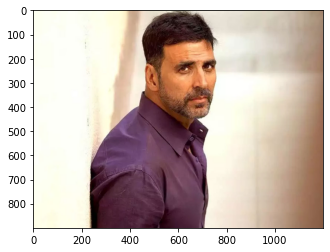

(900, 1200, 3)

In [64]:
img = read_file("sample.jpg")
img.shape

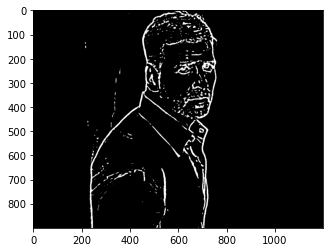

In [65]:
edges = edge_mask(img,13,7)
plt.imshow(edges,cmap="binary")
plt.show()

In [66]:
def color_quantization(img, k):
    data = np.float32(img).reshape((-1,3))
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001) 
    ret, label , center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

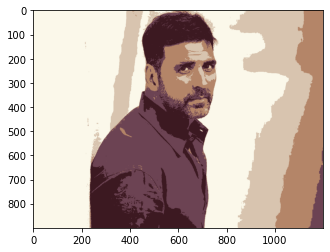

In [72]:
img_quantized = color_quantization(img, k=5)
plt.imshow(img_quantized)
plt.show()

# combine edge mask with quantized image

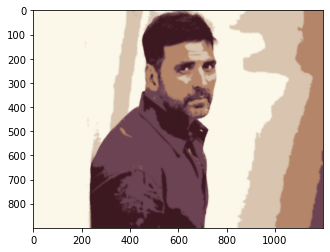

In [77]:
#reducing noise
blurred = cv2.bilateralFilter(img_quantized, d=10, sigmaColor=200, sigmaSpace=200)
plt.imshow(blurred)
plt.show()

In [78]:
def cartoon():
    c = cv2.bitwise_and(blurred,blurred,mask=edges)
    plt.imshow(c)
    plt.show()

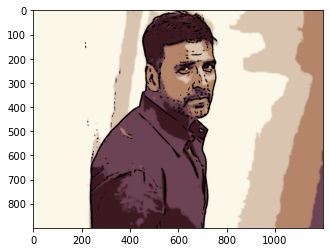

In [79]:
cartoon()